<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jorgefdzlara/blob/main/Notebooks_Modulo2_A01793062.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Curso Data Analysis with Pyton**
**Módulo 1**

**Alumno: Jorge Fernandez Lara**

**Matricula: A01793062**

##Data Wrangling 
**Objetivos:**
*   Manejar valores faltantes
*   Corregir el formato de los datos
*   Estandarizar y normalizar datos



**¿Qué es "data Wrangling"?**

Es el proceso de convertir datos de su formato inicial al un formato que pueda ser mejor para su análisis.


In [2]:
import pandas as pd
import matplotlib.pylab as plt

In [3]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Modifico las instrucciones al trabajar en colab

In [5]:
df = pd.read_csv(path, names = headers)

In [6]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


En el conjunto de datos existen varios datos marcados con "?" que corresponden a datos faltantes. 

Existen varias opciones para trabajar con datos faltantes, como son:


1.   Identificar datos faltantes
2.   Manejar los datos faltantes
3.   Corregir el formato de datos

##**Identificar y manejar los valores faltantes**

Convertir los valores "?" a NaN (Not a Number). Que es el marcador por default de Python para valores faltantes por razones de velocidad computacional y conveniencia. 





In [7]:
import numpy as np


df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Evaluar por datos faltantes**

Los datos faltantes son convertidos por default, existen dos formas para identificar los valores faltantes:
1.   .isnul()
2.   .notnull()

Y tienen como resultado unvalor booleano.

In [8]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
complete_data = df.notnull()
complete_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Basados en el resumen de arriba, cada columna tiene 205 filas de data y siete de estas columnas tienen datos faltantes:

1. "normalized-losses": 41 datos faltantes
2. "num-of-doors": 2 datos faltantes
3. "bore": 4 datos faltantes
4. "stroke" : 4 datos faltantes
5. "horsepower": 2 datos faltantes
6. "peak-rpm": 2 datos faltantes
7. "price": 4 datos faltantes

##**Manejar datos faltantes**

¿Cómo se manejan los datos faltantes?


*   Elimina los datos
1. Elimina la fila completa
2. Elimina la columna completa

*   Elemento de lista
1. Sustituye por el promedio
2. Sustituye por el valor más frecuente
3. Sustituye basado en otras funciones

Columnas completas sólo deben ser eliminadas si la mayoría de las entradas de la columna están vacías.  En nuestro conjunto de datos, ninguna de las colimas están suficientemente vacías para eliminarlas por completo. Sin embargo, algunos métoso parecieran más razonables que otros. Aplicaremos cada método a diferentes columnas:

Sustitución por promedio:
* **normalized-losses**: 41 datos faltantes, reemplazarlos con promedio.
* **stroke**: 4 datos faltantes, reemplazarlos con promedio. 
* **bore**: 4 datos faltantes, reemplazarlos con promedio.
* **horsepower**: 2 datos faltantes, reemplazarlos con promedio.
* **peak-rpm**: 2 datos faltantes, reemplazarlos con promedio.

Sustitución por frecuencia
* **Número de puertas** 2 datos faltantes, reemplazarlos por 4.
** Razón: 85 de los sedanes son 4 puertas, Como 4 puertas es más frecuente, es más probable que ocurra

Eliminar toda la fila.
* **price**: 4 datos faltantes, simplemente eliminar toda la fila.
** Razón: El precio es lo que queremos predecir, cualquier dato sin entrada no puede ser utilizado para la predicción. Por lo tanto, cualquier fila sin datos de precio no nos es de utilidad.




In [11]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [12]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [13]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [14]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

In [15]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Promedio de stroke:", avg_stroke)

df["stroke"].replace(np.nan, avg_stroke, inplace = True)

Promedio de stroke: 3.255422885572139


In [16]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Potencia promedio (horsepower):", avg_horsepower)

Potencia promedio (horsepower): 104.25615763546799


In [17]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [18]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Revoluciones por minuto pico promedio:", avg_peakrpm)

Revoluciones por minuto pico promedio: 5125.369458128079


In [19]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [20]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [21]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [22]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [23]:
df.dropna(subset=["price"], axis=0, inplace=True)

df.reset_index(drop=True, inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


##**Formato de datos correcto**


In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [26]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [27]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##**Estandarización de datos**

Los datos usualmente son recolectados de diferentes agencias en diferentes formatos. 

La estandarización de datos también es un término para un tipo particular de normalización, donde se extrae el promedio y se divide por la desviación estándar.

¿Qué es estandarización?

Es el proceso de transformar datos a un formato común, permitiendo al investigador hacer comparaciones significativas.

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [29]:
#Para convertir a km/hr es necesario dividir 235 entre las mph
df['city-L/100km'] = 235/df["city-mpg"]

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [30]:
df['highway-mpg'] = 235/df["highway-mpg"]
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


##**Normalización de datos**

**¿Qué es la normalización de datos?**

Es el proceso de transformar los valores de varias variables a algo similar en rango. Normalizaciones típicas incluyen escalar la variable para que el promedio sea 0, escalando la variable para que la varianza sea 1, o escalando la variable para que el rango de valores de la variable sea de 0 a 1.

In [31]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [32]:
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


##**Binning**

¿Por qué agrupamiento?

Es el proceso de transformar variables numéricas continuas a categorías discretas "bina" para un análisis agrupado.


In [33]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Al graficar los datos, se puede analizar la información para encontrar categorías:

Text(0.5, 1.0, 'horsepower bins')

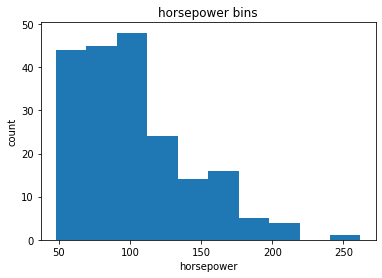

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Con linspace hacemos los 3 grupos que vamos a tener bajo, medio y alto y posteriormente agruparemos.

In [35]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [36]:
group_names = ['Low', 'Medium', 'High']

In [37]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [38]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

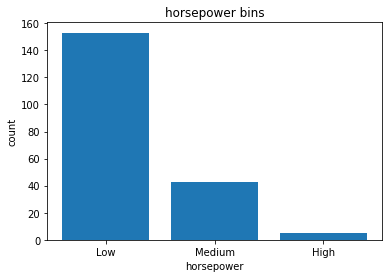

In [39]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

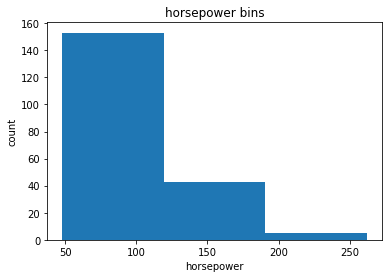

In [40]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

##**Variable indicador o variable muestra**

¿Qué es una variable indicador?

Es una variable numérica utilizada para etiquetar categorías. Se llaman "dummies" porque los números en sí no tienen un valor inherente.

¿Por qué utilizar variables indicador?

Utilizamos variables indicador para que podamos utilizar variables categóricas para análisis de regresión en módulos siguientes.

In [41]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

In [42]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [43]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)

In [46]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis = 1, inplace=True)

In [48]:
df.to_csv('clean_df.csv')